<a href="https://colab.research.google.com/github/julienVLNT/python-sandbox/blob/main/machine%20learning/sklearn_07_modele_lineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


**Julien VALENTIN**, **mars 2022**, d'après 

> [Machine learning in Python with scikit-learn](https://www.fun-mooc.fr/fr/cours/machine-learning-python-scikit-learn/) d'I.N.R.I.A sur [F.U.N](https://www.fun-mooc.fr/fr/)

### Import

In [2]:
import pandas

In [3]:
html_data = pandas.read_html("https://github.com/INRIA/scikit-learn-mooc/blob/57f2e69a976136a9d1f9409b69ef0d6b3509903c/datasets/penguins_regression.csv")

data = html_data[0]
data.head(10)

,Unnamed: 0,Flipper Length (mm),Body Mass (g)
0,NaN,181.0,3750.0
1,NaN,186.0,3800.0
2,NaN,195.0,3250.0
3,NaN,193.0,3450.0
4,NaN,190.0,3650.0
5,NaN,181.0,3625.0
6,NaN,195.0,4675.0
7,NaN,193.0,3475.0
8,NaN,190.0,4250.0
9,NaN,186.0,3300.0


In [4]:
data = data.drop(columns="Unnamed: 0")
data.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Flipper Length (mm)  342 non-null    float64
 1   Body Mass (g)        342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


### Séparation de l'attribut et de la cible

In [6]:
target_name = "Body Mass (g)"
feature_name = "Flipper Length (mm)"

x, y = data[[feature_name]], data[target_name]

### Modélisation

In [7]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()    # Modèle
linear_regression.fit(x, y)               # Entraînement

LinearRegression()

In [8]:
weight_flipper_length = linear_regression.coef_[0]    # Coefficient directeur
weight_flipper_length

49.68556640610011

In [9]:
intercept_body_mass = linear_regression.intercept_    # Translation
intercept_body_mass

-5780.831358077066

### Reconstruction du modèle linéaire

In [10]:
import numpy

flipper_length_range = numpy.linspace(x.min(), x.max(), num=300)

predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass)

Voyons le résultat.

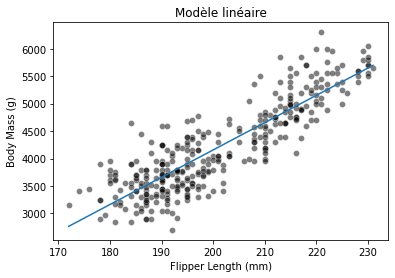

In [11]:
from matplotlib import pyplot
import seaborn

seaborn.scatterplot(x=data[feature_name], y=y, color="black", alpha=0.5)
pyplot.plot(flipper_length_range, predicted_body_mass)
_ = pyplot.title("Modèle linéaire")

### Evaluation du modèle

Deux exemples de métriques permettant d'évaluer le modèle sont les moindres carrés et les écarts moyens.

In [12]:
from sklearn.metrics import mean_squared_error

prediction = linear_regression.predict(x)
erreur = mean_squared_error(y, prediction)
print(f"L'erreur de moindres carrés est {erreur:.2f}")

L'erreur de moindres carrés est 154546.19


In [13]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(y, prediction)
print(f"L'erreur des écarts moyens est {model_error:.2f} g")

L'erreur des écarts moyens est 313.00 g
